In [ ]:
# STEP 1: Import all required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


2. LOADING THE DATASET

In [ ]:
# STEP 2: Load dataset

df = pd.read_csv("/content/studentpred_ml.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (200000, 9)


,student_id,name,course,attendance,previous_score,study_hours,grade_percent,grade_letter,pass_fail
0,STD000001,Vivaan Singh,BSc - Physics,70.5,70.9,3.2,93.0,A,Pass
1,STD000002,Ananya Chopra,BTech - EEE,70.6,56.2,5.2,60.0,C,Pass
2,STD000003,Vikram Rathod,BTech - Mechanical,64.1,87.5,2.3,82.0,B,Pass
3,STD000004,Rohan Naidu,BCA - Software Engineering,75.6,75.8,0.2,72.0,B,Pass
4,STD000005,Amrita Reddy,BTech - CSE,98.2,68.4,3.0,60.0,C,Pass


3. BASIC INFORMATION

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   student_id      200000 non-null  object 
 1   name            200000 non-null  object 
 2   course          200000 non-null  object 
 3   attendance      200000 non-null  float64
 4   previous_score  200000 non-null  float64
 5   study_hours     200000 non-null  float64
 6   grade_percent   200000 non-null  float64
 7   grade_letter    200000 non-null  object 
 8   pass_fail       200000 non-null  object 
dtypes: float64(4), object(5)
memory usage: 13.7+ MB


In [ ]:
#Check missing values
df.isnull().sum()


,0
student_id,0
name,0
course,0
attendance,0
previous_score,0
study_hours,0
grade_percent,0
grade_letter,0
pass_fail,0


In [ ]:
#Check duplicates and remove if any
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Duplicate rows: 0
Shape after dropping duplicates: (200000, 9)


In [ ]:
# Basic statistics for numeric columns
df.describe()

,attendance,previous_score,study_hours,grade_percent
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,79.790080,71.839670,2.322592,73.402235
std,11.485657,13.712421,1.251779,16.456628
min,30.000000,10.000000,0.000000,40.000000
25%,71.900000,62.500000,1.400000,60.000000
50%,80.000000,72.000000,2.300000,75.000000
75%,88.100000,81.400000,3.200000,87.000000
max,100.000000,100.000000,6.000000,100.000000


4. FEATURE OVERVIEW

In [ ]:
# View column names
df.columns

Index(['student_id', 'name', 'course', 'attendance', 'previous_score',
       'study_hours', 'grade_percent', 'grade_letter', 'pass_fail'],
      dtype='object')

### Features in the Dataset

- `student_id` – Unique ID for each student  
- `name` – Student name  
- `course` – Program & branch (e.g., BTech - CSE, BSc - CS, BBA - Finance, etc.)  
- `attendance` – Attendance percentage (40–100%)  
- `previous_score` – Previous exam percentage (20–100%)  
- `study_hours` – Daily study hours (0–6)  
- `grade_percent` – Final grade percentage (0–100)  
- `grade_letter` – A / B / C / D  
- `pass_fail` – Pass / Fail (target for classification)

For this project, we mainly predict:

- **Primary Target:** `pass_fail` (to identify weak students)  
- **Secondary View:** `grade_letter` and `grade_percent` (for deeper analysis)



5. DATA ANALYSIS

pass_fail
Pass    173000
Fail     27000
Name: count, dtype: int64


/tmp/ipython-input-4043732253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='pass_fail', data=df, palette="Set2")


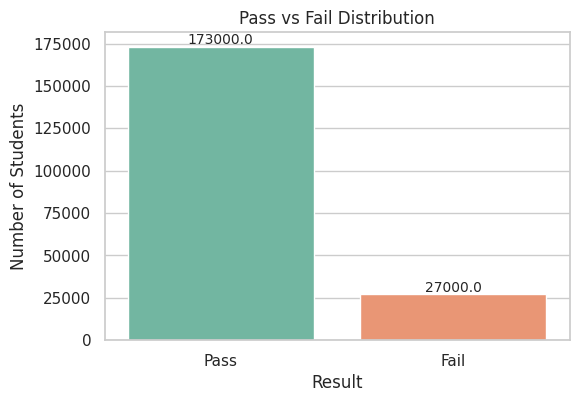

In [ ]:
# STEP 5.1: Pass vs Fail counts

pass_fail_counts = df['pass_fail'].value_counts()
print(pass_fail_counts)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='pass_fail', data=df, palette="Set2")
plt.title("Pass vs Fail Distribution")
plt.xlabel("Result")
plt.ylabel("Number of Students")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()


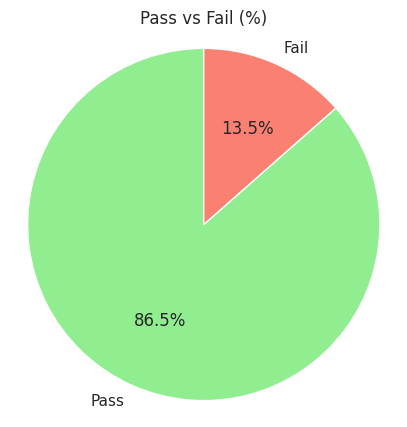

In [ ]:
# Pie chart for Pass vs Fail

plt.figure(figsize=(5,5))
plt.pie(pass_fail_counts,
        labels=pass_fail_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightgreen', 'salmon'])
plt.title("Pass vs Fail (%)")
plt.axis('equal')
plt.show()


/tmp/ipython-input-1545013735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='grade_letter',


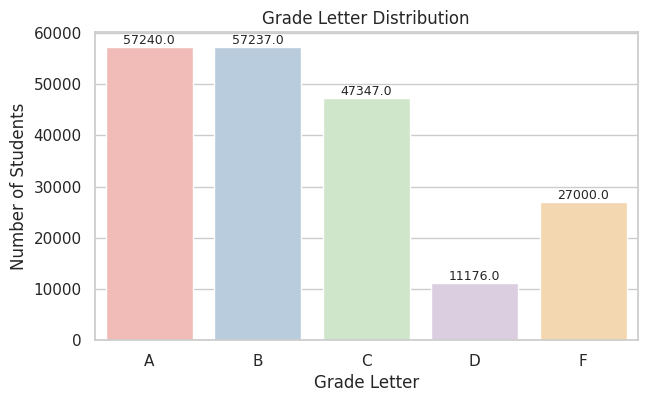

In [ ]:
# STEP 5.2: Grade letter distribution

grade_counts = df['grade_letter'].value_counts().reindex(['A','B','C','D','F'])

plt.figure(figsize=(7,4))
ax = sns.countplot(x='grade_letter',
                   data=df,
                   order=['A','B','C','D','F'],
                   palette="Pastel1")
plt.title("Grade Letter Distribution")
plt.xlabel("Grade Letter")
plt.ylabel("Number of Students")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)
plt.show()


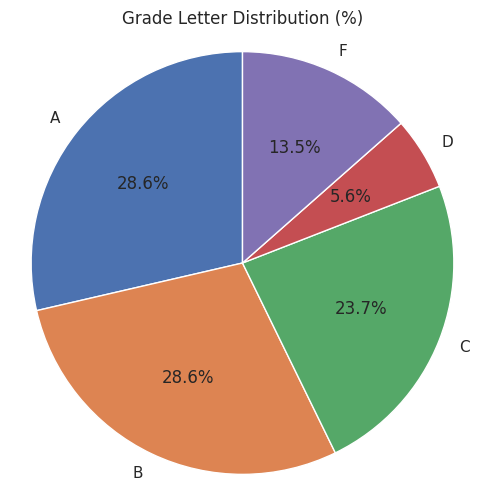

In [ ]:
# Pie chart for grade letters

plt.figure(figsize=(6,6))
plt.pie(grade_counts,
        labels=grade_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Grade Letter Distribution (%)")
plt.axis('equal')
plt.show()


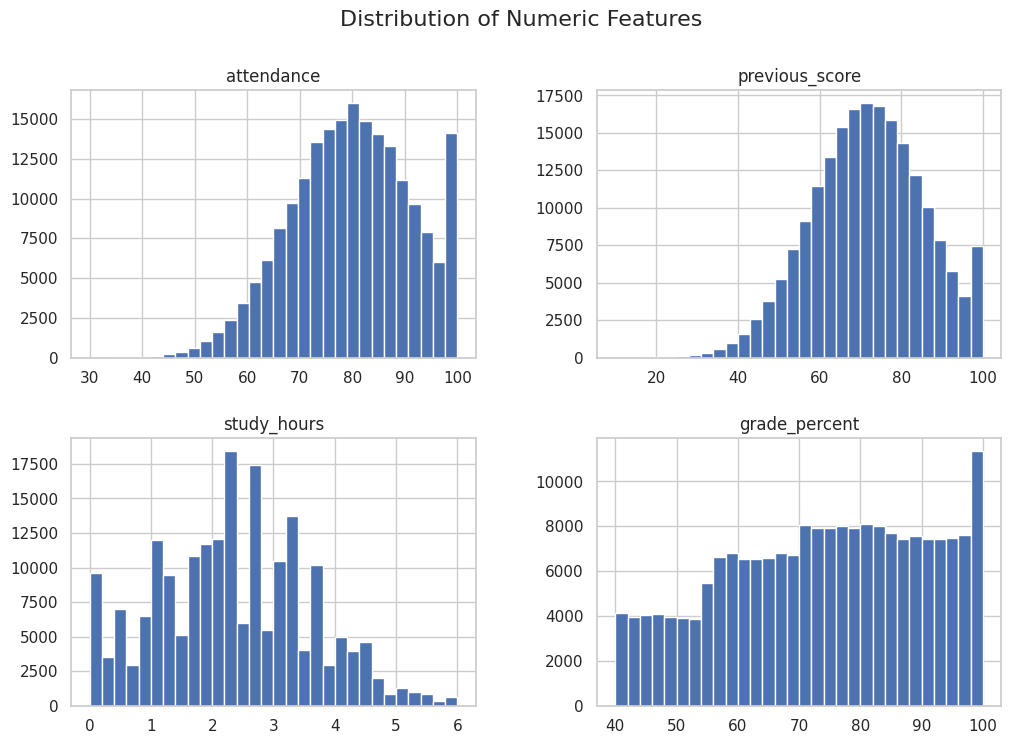

In [ ]:
# STEP 5.3: Histograms for numeric columns

numeric_cols = ['attendance', 'previous_score', 'study_hours', 'grade_percent']

df[numeric_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


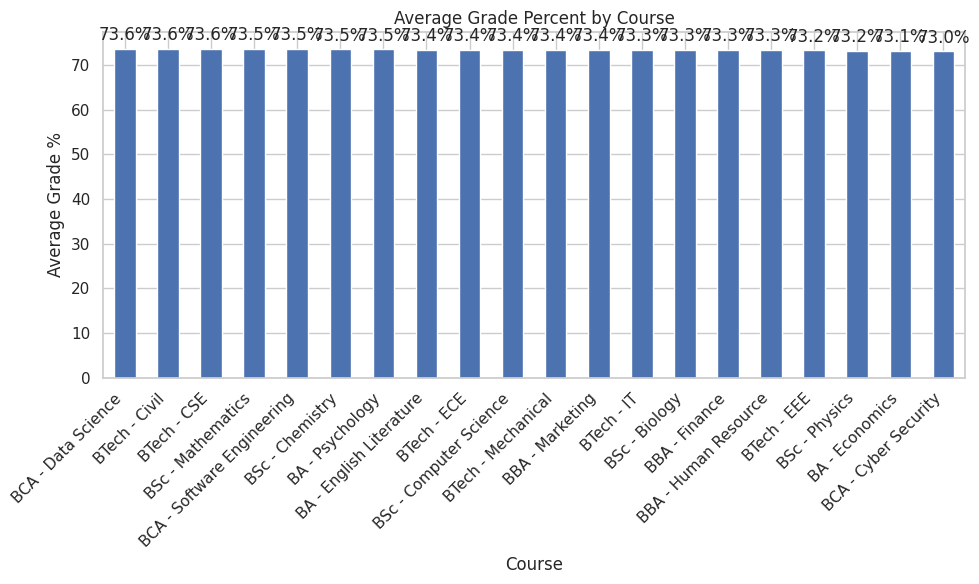

In [ ]:
# STEP 5.4: Average grade by course

course_avg = df.groupby('course')['grade_percent'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = course_avg.plot(kind='bar')
plt.title("Average Grade Percent by Course")
plt.xlabel("Course")
plt.ylabel("Average Grade %")
plt.xticks(rotation=45, ha='right')

# Add average percent numbers to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-404073048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pass_fail', y='attendance', data=df, palette="Set3")


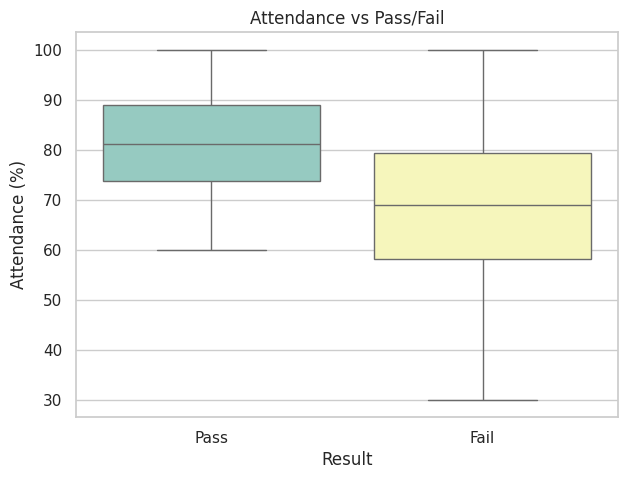

In [ ]:
# STEP 5.5: Attendance vs Pass/Fail

plt.figure(figsize=(7,5))
sns.boxplot(x='pass_fail', y='attendance', data=df, palette="Set3")
plt.title("Attendance vs Pass/Fail")
plt.xlabel("Result")
plt.ylabel("Attendance (%)")
plt.show()


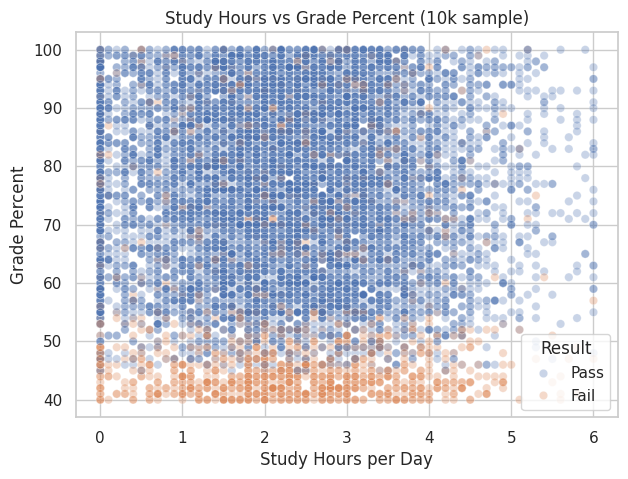

In [ ]:
# STEP 5.6: Study hours vs Grade (%)

df_sample = df.sample(n=10000, random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(x='study_hours', y='grade_percent',
                hue='pass_fail', data=df_sample, alpha=0.3)
plt.title("Study Hours vs Grade Percent (10k sample)")
plt.xlabel("Study Hours per Day")
plt.ylabel("Grade Percent")
plt.legend(title="Result")
plt.show()


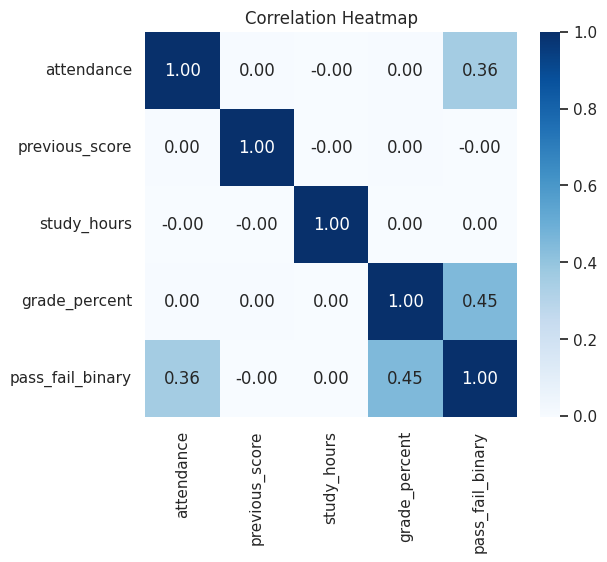

In [ ]:
# STEP 5.7: Correlation heatmap (numeric + encoded target)

df_corr = df.copy()
df_corr['pass_fail_binary'] = df_corr['pass_fail'].map({'Fail':0, 'Pass':1})

corr_cols = ['attendance', 'previous_score', 'study_hours', 'grade_percent', 'pass_fail_binary']
corr = df_corr[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


6. FEATURES AND TARGETS

In [ ]:
# STEP 6: Define feature matrix X and target y

# Drop rows where 'pass_fail' is NaN to avoid stratification error
df_cleaned = df.dropna(subset=['pass_fail']).copy()

feature_cols = ['course', 'attendance', 'previous_score', 'study_hours']
target_col = 'pass_fail'

X = df_cleaned[feature_cols].copy()
y = df_cleaned[target_col].copy()

# Encode target labels (Pass/Fail -> 1/0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Label mapping:", dict(zip(label_encoder.classes_,
                                 label_encoder.transform(label_encoder.classes_))))

Label mapping: {'Fail': np.int64(0), 'Pass': np.int64(1)}


7. TRAIN/TEST SPLIT

In [ ]:
# STEP 7: Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (160000, 4)
Test set shape: (40000, 4)


8. PREPROCESSING(ENCODING+SCALING)

In [ ]:
# STEP 8: Preprocessing pipeline
# course -> OneHotEncoder
# numeric -> StandardScaler

categorical_features = ['course']
numeric_features = ['attendance', 'previous_score', 'study_hours']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)


9. BASE MODELS

Logistic Regression Accuracy: 0.892075

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

        Fail       1.00      0.20      0.33      5400
        Pass       0.89      1.00      0.94     34600

    accuracy                           0.89     40000
   macro avg       0.94      0.60      0.64     40000
weighted avg       0.90      0.89      0.86     40000



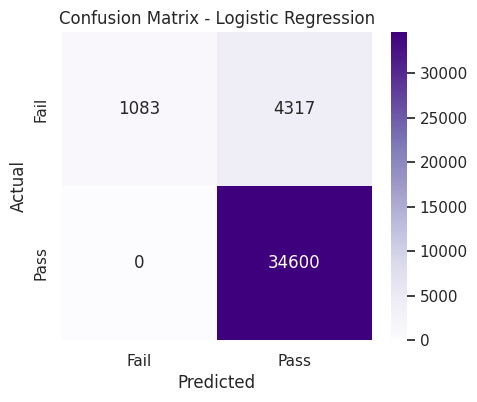

In [ ]:
from sklearn.linear_model import LogisticRegression

# STEP 9.1: Logistic Regression baseline

log_reg_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_clf.fit(X_train, y_train)
y_pred_lr = log_reg_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Purples",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Accuracy: 0.908175

Classification Report (Random Forest - Base):

              precision    recall  f1-score   support

        Fail       0.93      0.35      0.50      5400
        Pass       0.91      1.00      0.95     34600

    accuracy                           0.91     40000
   macro avg       0.92      0.67      0.73     40000
weighted avg       0.91      0.91      0.89     40000



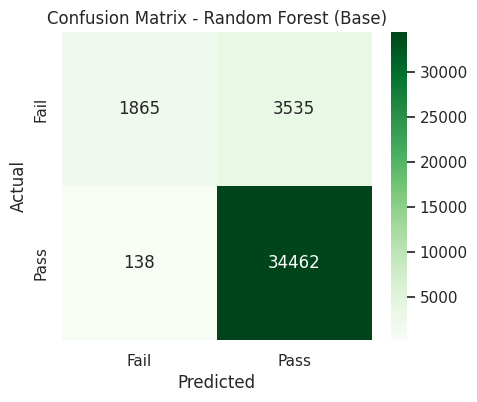

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# STEP 9.2: Random Forest baseline

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest - Base):\n")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Base)")
plt.show()


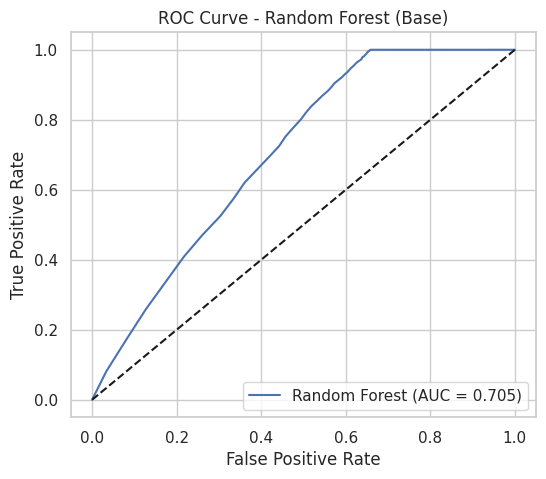

In [ ]:
# STEP 9.3: ROC Curve for Random Forest

y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Base)")
plt.legend()
plt.show()


10. HYPERPARAMETER TUNING

In [ ]:
# STEP 10: Hyperparameter tuning with GridSearchCV on Random Forest

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Cross-Validation Accuracy: 0.9088124980788255


11. BEST MODEL

Test Accuracy (Best Model): 0.9085

Classification Report (Best Model):

              precision    recall  f1-score   support

        Fail       0.94      0.34      0.50      5400
        Pass       0.91      1.00      0.95     34600

    accuracy                           0.91     40000
   macro avg       0.92      0.67      0.73     40000
weighted avg       0.91      0.91      0.89     40000



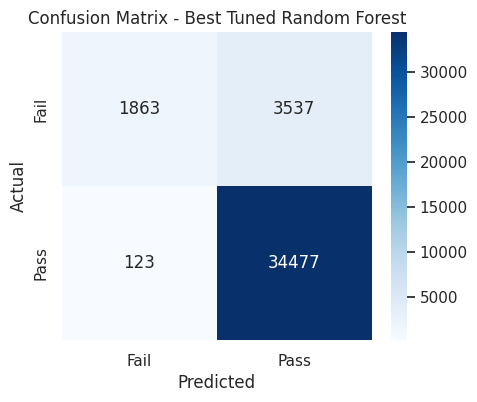

ROC-AUC (Best Model): 0.706810206593877


In [ ]:
# STEP 11: Evaluate tuned Random Forest on test data

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Tuned Random Forest")
plt.show()

roc_auc_best = roc_auc_score(y_test, y_proba_best)
print("ROC-AUC (Best Model):", roc_auc_best)


12. IDENTIFICATION

In [ ]:
# STEP 12.1: Predict pass/fail for all students

full_pred = best_model.predict(X)
df['predicted_pass_fail'] = label_encoder.inverse_transform(full_pred)
df['predicted_is_weak'] = df['predicted_pass_fail'].apply(lambda x: 1 if x == 'Fail' else 0)

df['predicted_is_weak'].value_counts()


,count
predicted_is_weak,
0,176389
1,23611


In [ ]:
# STEP 12.2: Extract weak students

weak_students = df[df['predicted_is_weak'] == 1].copy()
print("Number of predicted weak students:", weak_students.shape[0])
weak_students.head()


course
BTech - CSE               2836
BSc - Computer Science    2115
BTech - IT                1684
BTech - ECE               1651
BTech - EEE               1428
BSc - Mathematics         1240
BTech - Mechanical        1236
BCA - Data Science        1214
BBA - Finance             1199
BSc - Physics             1191
Name: count, dtype: int64


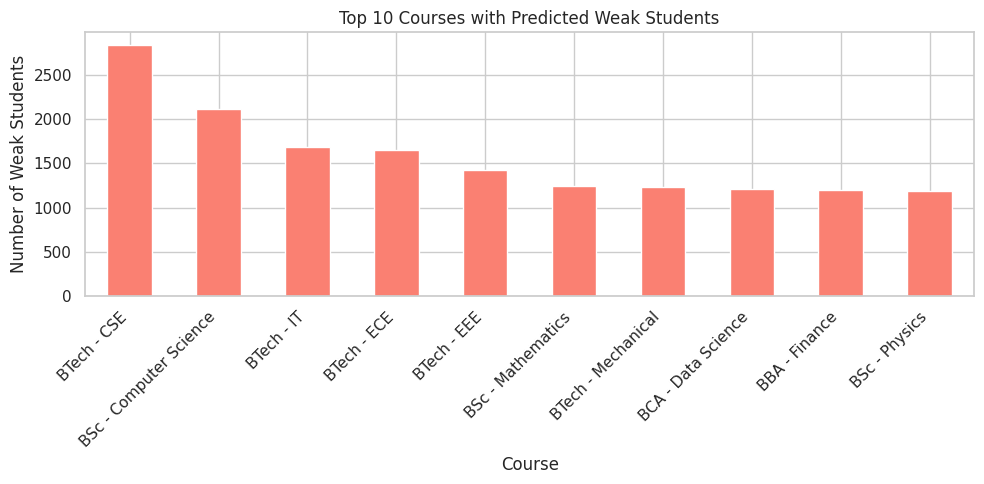

In [ ]:
# STEP 12.3: Top courses with weak students

weak_by_course = weak_students['course'].value_counts().head(10)
print(weak_by_course)

plt.figure(figsize=(10,5))
weak_by_course.plot(kind='bar', color='salmon')
plt.title("Top 10 Courses with Predicted Weak Students")
plt.xlabel("Course")
plt.ylabel("Number of Weak Students")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


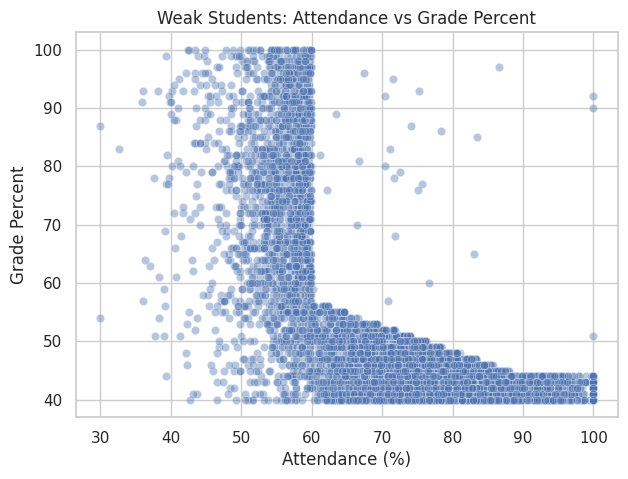

In [ ]:
# STEP 12.4: Attendance vs Grade for weak students

weak_sample = weak_students.sample(n=min(5000, weak_students.shape[0]), random_state=42)

plt.figure(figsize=(7,5))
sns.scatterplot(data=weak_sample, x='attendance', y='grade_percent', alpha=0.4)
plt.title("Weak Students: Attendance vs Grade Percent")
plt.xlabel("Attendance (%)")
plt.ylabel("Grade Percent")
plt.show()


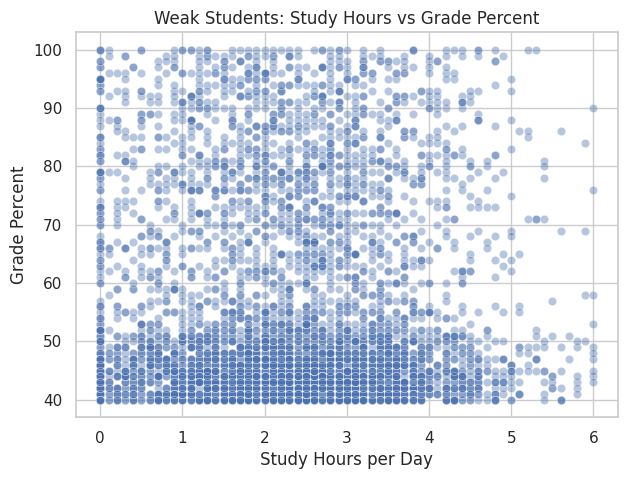

In [ ]:
# STEP 12.5: Study hours vs Grade for weak students

plt.figure(figsize=(7,5))
sns.scatterplot(data=weak_sample, x='study_hours', y='grade_percent', alpha=0.4)
plt.title("Weak Students: Study Hours vs Grade Percent")
plt.xlabel("Study Hours per Day")
plt.ylabel("Grade Percent")
plt.show()


In [ ]:
# STEP 12.6: Save weak student list for intervention (optional)

weak_students.to_csv("predicted_weak_students_list.csv", index=False)
print("Weak students list saved as predicted_weak_students_list.csv")


Weak students list saved as predicted_weak_students_list.csv


CONCLUSION

## ✅ Conclusion

- Built a complete **ML pipeline** on a dataset of 200,000 students.
- Performed **EDA** with bar charts, pie charts, grade distribution, course-wise performance, correlation heatmap.
- Trained **Logistic Regression** and **Random Forest** models.
- Used **GridSearchCV** for hyperparameter tuning of Random Forest.
- Achieved a test accuracy of around **(write your value from output)** with the best tuned model.
- The model was used to **identify weak students** (predicted Fail), and we analyzed:
  - Courses with higher concentration of weak students.
  - Relationship between **attendance**, **study hours** and **grade percent** among weak students.

This system can help teachers and institutions to:
- Detect at-risk students early.
- Provide extra coaching, mentoring, or counselling.
- Focus on courses/branches where performance is relatively poorer.
